In [1]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from matplotlib import style

Importando a base de dados Iris

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Em um primeiro momento será feita a separação dos dados em treino e classes

In [4]:
treino = iris.data

In [5]:
classes = iris.target

In [10]:
treino.shape

(150, 4)

In [12]:
treino[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [13]:
classes.shape

(150,)

In [15]:
#Visualizando os dados das classes. Números que representam cada uma das classes
set(classes)

{0, 1, 2}

In [18]:
classes[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Visualização de dados
- Visualizando a disperção dos dados quanto as classes

In [6]:
style.use('ggplot')

<IPython.core.display.Javascript object>


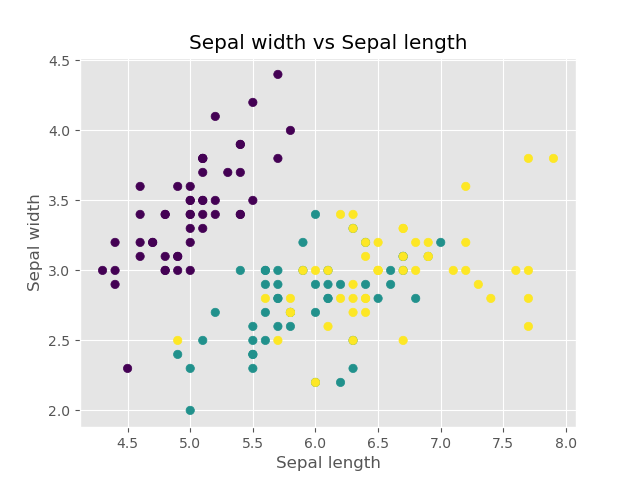

In [29]:
#Dados do plot - Sepal width e Sepal length
%matplotlib notebook

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[:,0],treino[:,1], c=classes)

<IPython.core.display.Javascript object>


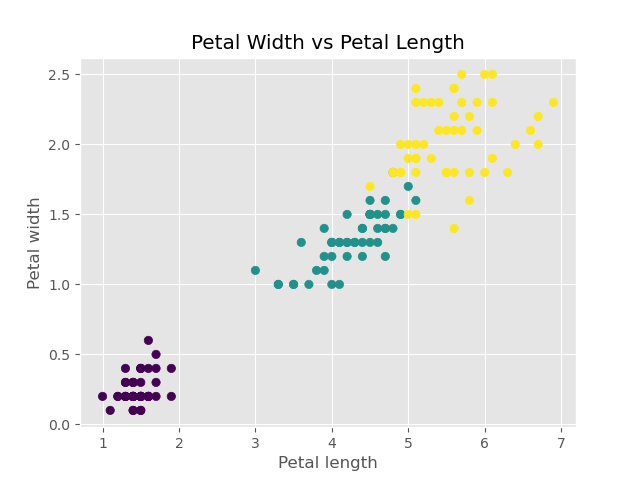

In [46]:
#Dados do plor - Petal width e Petal length
%matplotlib notebook

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width vs Petal Length')
plt.scatter(treino[:,2], treino[:,3], c=classes)

### Aplicando o SVM aos dados
- Utilizandos os dados da base iremos treinar e desenvolver o modelo de classificação

Para o conjuto de treino e de teste serão separados 80% e 20% para cada, respectivamente.

In [30]:
len(treino[:-30]), len(classes[:-30])

(120, 120)

In [32]:
treino[:-30]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [33]:
classes[:-30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Treino do algoritmo SVM
clf = svm.SVC().fit(treino[:-30],classes[:-30])

In [35]:
clf

SVC()

In [8]:
# Criação do conjunto de teste
teste = treino[-30:]

In [9]:
clf.predict(teste)

array([2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 1])

In [10]:
classes_teste = classes[-30:]

In [11]:
classes_teste

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

### Visualizando os resultados do método de predição

<IPython.core.display.Javascript object>


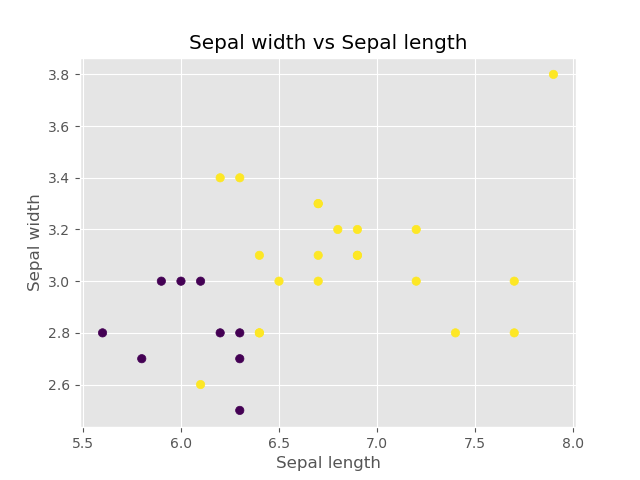

In [47]:
%matplotlib notebook

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[-30:,0],treino[-30:,1], c=clf.predict(teste))

<IPython.core.display.Javascript object>


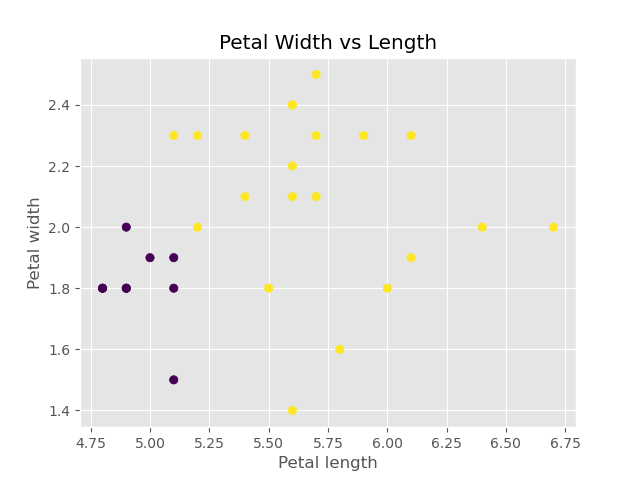

In [48]:
%matplotlib notebook
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width vs Length')
plt.scatter(treino[-30:,2], treino[-30:,3], c=clf.predict(teste))

<IPython.core.display.Javascript object>


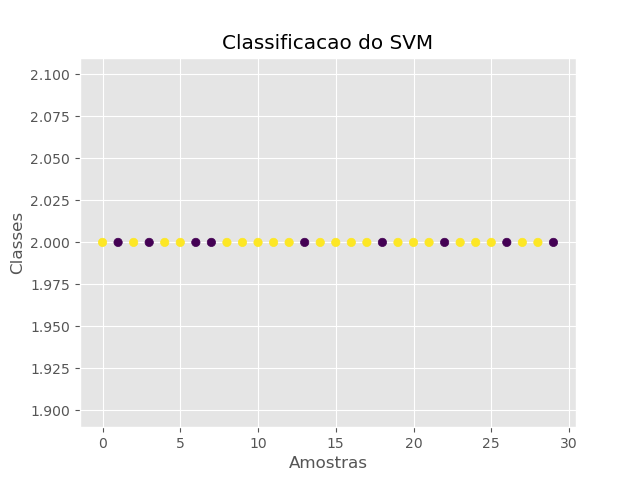

In [49]:
%matplotlib notebook
plt.xlabel('Amostras')
plt.ylabel('Classes')
plt.title('Classificacao do SVM')
plt.scatter(range(len(classes_teste)),classes_teste,c=clf.predict(teste))

### Matriz de confusão

In [12]:
print (pd.crosstab(classes_teste,clf.predict(teste),rownames=['Real'], colnames=['Predito'], margins=True),'')

Predito  1   2  All
Real               
2        9  21   30
All      9  21   30 


### Validação cruzada

In [15]:
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=10)
    return metrics.accuracy_score(y,resultados)

In [14]:
Acuracia(clf,treino,classes)

0.9733333333333334

### Métricas de avaliação

In [15]:
resultados = cross_val_predict(clf,treino, classes, cv=10)
valor_classes = [0,1,2]
print (metrics.classification_report(classes,resultados,valor_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



C:\Users\Caio\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


### Base de dados Spotify - escolha de música

In [2]:
dataset = pd.read_csv('data.csv')

In [18]:
dataset.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


### Analise dos dados

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [20]:
dataset.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [22]:
#Checagem de valores nulos
dataset.isnull().sum()

id                  0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [23]:
#Lista de estilos disponíveis no Matplotlib
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

- Exploração dos dados empregando diversos tipos de gráficos

In [29]:
dataset.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

<IPython.core.display.Javascript object>


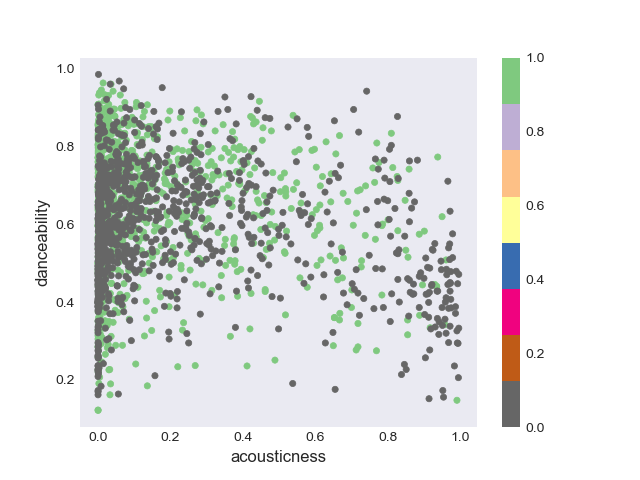

In [59]:
%matplotlib notebook
from matplotlib import style
style.use("seaborn-pastel")
dataset.plot(x='acousticness', y='danceability', c=classe, kind='scatter', colormap='Accent_r')

<IPython.core.display.Javascript object>


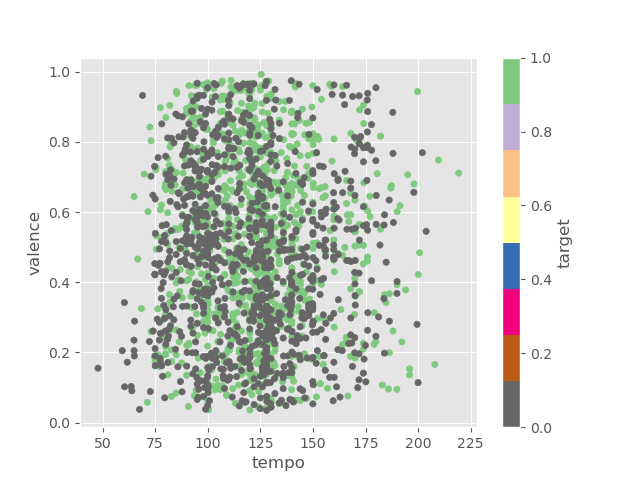

In [25]:
%matplotlib notebook
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='tempo', y='valence', c='target', kind='scatter' , colormap='Accent_r')

<IPython.core.display.Javascript object>


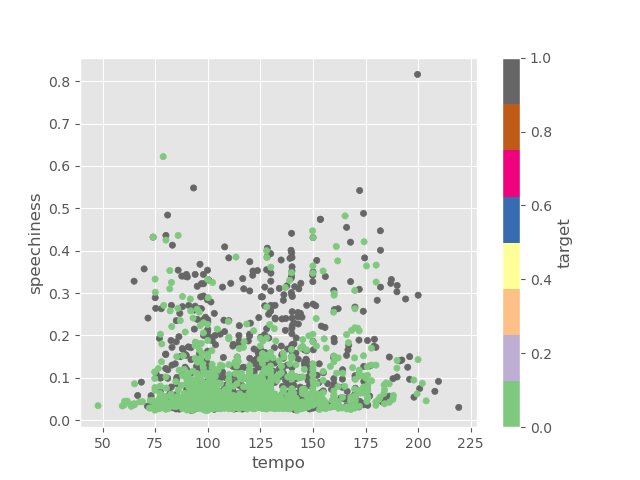

In [26]:
%matplotlib notebook
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='tempo', y='speechiness', c='target', kind='scatter' , colormap='Accent')

<IPython.core.display.Javascript object>


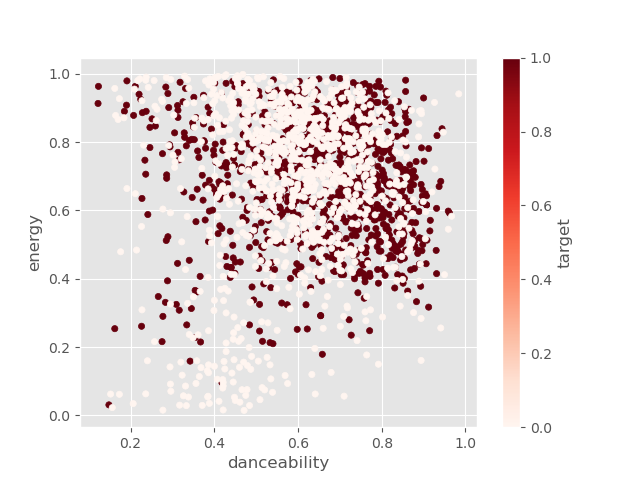

In [27]:
%matplotlib notebook
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='danceability', y='energy', c='target', kind='scatter' , colormap='Reds')

- Separando uma coluna específica para futura análise

In [3]:
classes = dataset['target']

In [4]:
dataset.drop('target', axis=1, inplace=True)

In [35]:
dataset.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Parallel Lines,Junior Boys


### Pré-processamento dos dados

In [5]:
def remove_features(lista_features):
    for i in lista_features:
        dataset.drop(i, axis=1, inplace=True)
    return 0

In [6]:
#Aplicação de método para remoção de colunas que não agregam ao estudo
remove_features(['id', 'song_title'])

0

In [38]:
dataset.artist.head(10)

0              Future
1    Childish Gambino
2              Future
3         Beach House
4         Junior Boys
5               Drake
6               Drake
7               Omega
8         Death Grips
9         Honey Claws
Name: artist, dtype: object

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  artist            2017 non-null   object 
dtypes: float64(10), int64(3), object(1)
memory usage: 220.7+ KB


### Label Encolder

Este método codifica em números inteiros os valores categóricos de uma classe

In [41]:
from sklearn.preprocessing import LabelEncoder

- Guardando o método a ser utilizado em uma variável

In [42]:
enc = LabelEncoder()

In [43]:
inteiros = enc.fit_transform(dataset['artist'])

In [45]:
set(inteiros)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [46]:
#Criando coluna no dataset para guardas os valores transformados
dataset['artist_inteiros'] = inteiros

In [47]:
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys,628


In [50]:
#Removeção da coluna 'artist' para que só fique a coluna com valores inteiros
remove_features(['artist'])

0

In [51]:
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,628


### One Hot Encoder
- Similar ao Label Encoder, porém cria uma matriz de presença, resolvendo o problema de **codificação** nos dados gerados pelo Label Encoder

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
# Instancia um objeto do tipo OnehotEncoder
ohe = OneHotEncoder()

In [62]:
dataset.values

array([[1.02000e-02, 8.33000e-01, 2.04600e+05, ..., 4.00000e+00,
        2.86000e-01, 4.49000e+02],
       [1.99000e-01, 7.43000e-01, 3.26933e+05, ..., 4.00000e+00,
        5.88000e-01, 2.22000e+02],
       [3.44000e-02, 8.38000e-01, 1.85707e+05, ..., 4.00000e+00,
        1.73000e-01, 4.49000e+02],
       ...,
       [8.57000e-03, 6.37000e-01, 2.07200e+05, ..., 4.00000e+00,
        4.70000e-01, 9.47000e+02],
       [1.64000e-03, 5.57000e-01, 1.85600e+05, ..., 4.00000e+00,
        6.23000e-01, 1.24200e+03],
       [2.81000e-03, 4.46000e-01, 2.04520e+05, ..., 4.00000e+00,
        4.02000e-01, 1.32000e+02]])

In [63]:
# transforma em numpy array o dataset
dataset_array = dataset.values

In [64]:
# Pega o numero de linhas.
num_rows = dataset_array.shape[0]

In [65]:
# Visualiza coluna de inteiros
dataset_array[:][:,13]

array([ 449.,  222.,  449., ...,  947., 1242.,  132.])

In [66]:
# Transforma a matriz em uma dimensão
inteiros = inteiros.reshape(len(inteiros),1)

In [67]:
# Criar as novas features a partir da matriz de presença
novas_features = ohe.fit_transform(inteiros)

In [68]:
novas_features

<2017x1343 sparse matrix of type '<class 'numpy.float64'>'
	with 2017 stored elements in Compressed Sparse Row format>

In [69]:
# Concatena as novas features ao array
dataset_array = np.concatenate([dataset_array, novas_features.toarray()], axis=1)

In [71]:
dataset_array.shape

(2017, 1357)

In [72]:
# Transforma em dataframe e visualiza as colunas
dataf = pd.DataFrame(dataset_array)

In [74]:
dataf.head(100)

,0,1,2,3,4,5,6,7,8,9,...,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356
0,0.0102,0.833,204600.0,0.434,0.021900,2.0,0.1650,-8.795,1.0,0.4310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1990,0.743,326933.0,0.359,0.006110,1.0,0.1370,-10.401,1.0,0.0794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0344,0.838,185707.0,0.412,0.000234,2.0,0.1590,-7.148,1.0,0.2890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.6040,0.494,199413.0,0.338,0.510000,5.0,0.0922,-15.236,1.0,0.0261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1800,0.678,392893.0,0.561,0.512000,5.0,0.4390,-11.648,0.0,0.0694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.1700,0.615,214150.0,0.814,0.000000,9.0,0.2180,-3.903,0.0,0.0677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0604,0.799,333520.0,0.789,0.000000,0.0,0.0338,-8.208,1.0,0.0396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0571,0.398,247390.0,0.776,0.017200,9.0,0.3030,-7.388,0.0,0.0374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.7160,0.685,427227.0,0.423,0.518000,11.0,0.0765,-9.031,0.0,0.0475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Pandas Get Dummies
- Cria uma matriz de presença similar ao do One Hot Encoder

In [7]:
# Aplicando o get_dummies nos dados.
dataset = pd.get_dummies(dataset, columns=['artist'], prefix=['artist'])

In [8]:
#Visualização dos recursos gerados
dataset.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness',
       ...
       'artist_alt-J', 'artist_deadmau5', 'artist_for KING & COUNTRY',
       'artist_one sonic society', 'artist_tUnE-yArDs', 'artist_tobyMac',
       'artist_권나무 Kwon Tree', 'artist_도시총각 Dosichonggak',
       'artist_카우칩스 The CowChips', 'artist_플랫핏 Flat Feet'],
      dtype='object', length=1356)

In [27]:
len(dataset.columns)

1356

In [9]:
dataset.isnull().sum()

acousticness                0
danceability                0
duration_ms                 0
energy                      0
instrumentalness            0
                           ..
artist_tobyMac              0
artist_권나무 Kwon Tree        0
artist_도시총각 Dosichonggak    0
artist_카우칩스 The CowChips    0
artist_플랫핏 Flat Feet        0
Length: 1356, dtype: int64

In [10]:
dataset.dtypes

acousticness                float64
danceability                float64
duration_ms                   int64
energy                      float64
instrumentalness            float64
                             ...   
artist_tobyMac                uint8
artist_권나무 Kwon Tree          uint8
artist_도시총각 Dosichonggak      uint8
artist_카우칩스 The CowChips      uint8
artist_플랫핏 Flat Feet          uint8
Length: 1356, dtype: object

### Pipeline

In [11]:
# Importação das bibliotecas de Pipelines e Pré-processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Treinando o algoritmo de SVM.
clf = svm.SVC().fit(dataset,classes)

In [13]:
clf

SVC()

In [16]:
#Checando a acurácia do método
Acuracia(clf,dataset,classes)

0.5577590480912246

In [17]:
# Criando um pipeline
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC())
])

In [18]:
# Imprimindo Etapas do Pipeline
pip_1.steps

[('scaler', StandardScaler()), ('clf', SVC())]

In [19]:
# Chama a função acuracia passando os dados de musicas e as classes
# Usando o pipeline pip_1
Acuracia(pip_1,dataset,classes)

0.58601883986118

In [20]:
# Criando vários Pipelines
pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

In [21]:
# Chama a função acuracia passando os dados de musicas e as classes
# Usando o pipeline pip_2
Acuracia(pip_2,dataset,classes)

0.7223599405057015

### Teste da base de dados no Label Encoder

In [22]:
# Teste com apenas LabelEncoder na coluna 'artist' usando o pipeline 'pip_1'
Acuracia(pip_1,dataset,classes)

0.58601883986118

In [23]:
# Teste com apenas LabelEncoder na coluna 'artist' usando o pipeline 'pip_2'
Acuracia(pip_2,dataset,classes)

0.7223599405057015

### Testando desempenho dos Kenerls

In [24]:
# Testando o Kernel RBF
Acuracia(pip_3,dataset,classes)

0.58601883986118

In [25]:
# Teste de kernel poly
Acuracia(pip_4,dataset,classes)

0.5751115518096183

In [26]:
# Teste de Kernel linear
Acuracia(pip_5,dataset,classes)

0.6058502726822013

### Teste de Overfitting

In [27]:
# Utiliza a função train_test_split para separar conjunto de treino e teste em 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, classes, test_size=0.2, random_state=123)

In [28]:
# Scala os dados de treino e teste.
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler2 = StandardScaler().fit(X_test)
X_test = scaler2.transform(X_test)

In [29]:
# Treina o algoritmo
clf.fit(X_train, y_train)

SVC()

In [30]:
# Resultados de predição.
y_pred  = clf.predict(X_test)

In [31]:
# Imprime a acurácia.
metrics.accuracy_score(y_test,y_pred)

0.6732673267326733

- Testando a classificação com o próprio teste

In [32]:
# Resultados de predição
y_pred  = clf.predict(X_train)

In [33]:
# Imprime a Acurácia.
metrics.accuracy_score(y_train,y_pred)

0.9851208927464352

### Tunning